<a href="https://colab.research.google.com/github/rishit020/linear-regression-scratch-first-repo/blob/main/linear_regression_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import sklearn.datasets as ds
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('salary.csv')

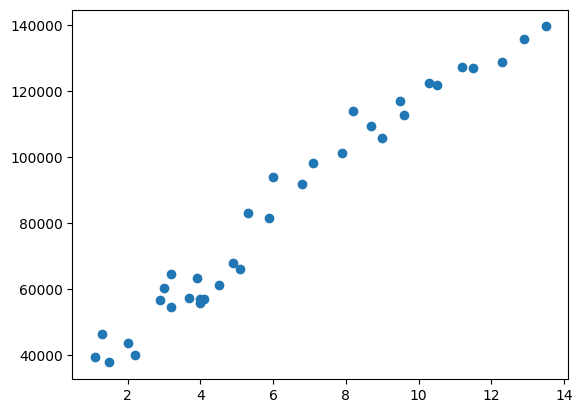

In [15]:
x = data['YearsExperience']
y = data['Salary']

plt.scatter(x, y)


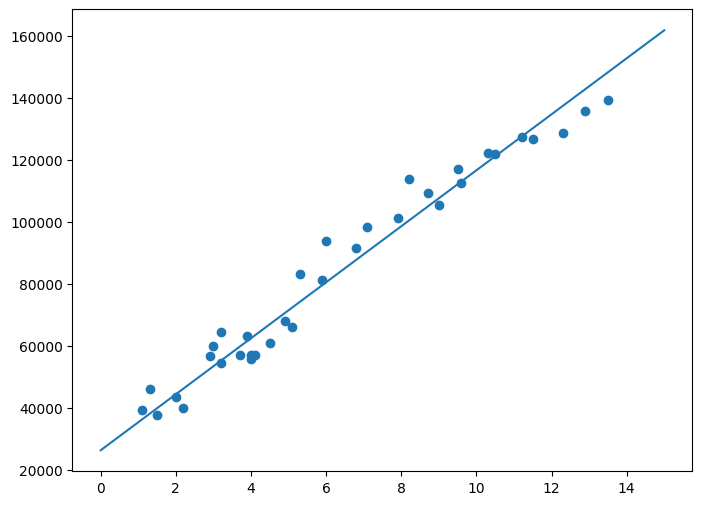

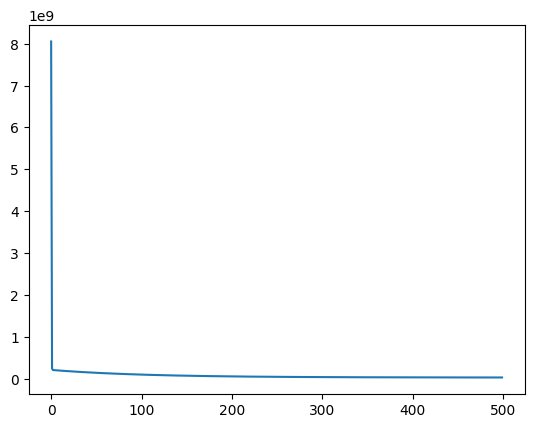

In [16]:
m = 0
b = 0

learning_rate = 0.01
epochs = 500
loss = []
n = float(x.shape[0])

for i in range(epochs):
  y_pred = m * x + b
  mse = (1/n) * np.sum((y - y_pred)**2)
  loss.append(mse)

  dm = (-2/n) * np.sum(x*(y - y_pred))
  db = (-2/n) * np.sum(y - y_pred)

  m = m - learning_rate * dm
  b = b - learning_rate * db

x_line = np.linspace(0, 15, 100)
y_line = m*x_line + b
plt.figure(figsize=(8,6))
plt.plot(x_line, y_line)
plt.scatter(x, y)
plt.show()
plt.plot(loss)
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_pred)
print(f"MSE: {mse}")

MSE: 36539293.32165982


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
x = data['YearsExperience']
y = data['Salary']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x.values.reshape(-1, 1), y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(x_train, y_train)

In [26]:
reg.predict(x_test)

array([110576.91706292,  64251.57268882, 103713.90308157,  89987.87511888,
        71114.58667017, 119155.68453961,  80551.23089452])

In [29]:
reg.score(x_test, y_test)

0.8914234140042779

In [30]:
from sklearn.metrics import mean_squared_error

# Assuming you have your true test values in y_test and your model's predictions in y_pred_test
# If you haven't already, you can get predictions using:
y_pred_test = reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 55761791.306260146


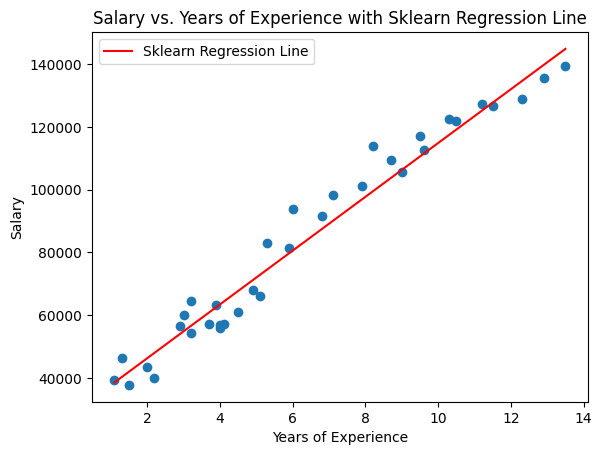

In [32]:
# Plot the original data
plt.scatter(x, y)

# Get the slope (coefficient) and intercept from the trained scikit-learn model
m_sklearn = reg.coef_[0]
b_sklearn = reg.intercept_

# Create a range of x values for the regression line
x_line_sklearn = np.linspace(x.min(), x.max(), 100)

# Calculate the corresponding y values for the regression line
y_line_sklearn = m_sklearn * x_line_sklearn + b_sklearn

# Plot the regression line
plt.plot(x_line_sklearn, y_line_sklearn, color='red', label='Sklearn Regression Line')

# Add labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Years of Experience with Sklearn Regression Line')
plt.legend()
plt.show()